# Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [6]:
filename = '/home/shailesh/Desktop/fuse-project-1/dataset/orginal_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)
dataframe.shape

(756, 755)

In [7]:
dataframe.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Data Extraction from the dataset

Baseline Features: Column-3 to Column-23
Intensity Parameters: Col24 to Col26
Formant Frequencies: Col27 to Col30
Bandwidth Parameters: Col31 to Col34
Vocal Fold: Col35 to Col56
MFCC: Col57 to Col140
Wavelet Features: Col141 to Col322
TQWT Features: Col323 to Col754
Class: Col755

Refer Research Page: 6 - 9

In [152]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:754]
y = dataframe['class']

### Baseline Columns

In [153]:
mean_value_columns = [cols for cols in baseline.columns if cols.__contains__('mean')]
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(mean_value_columns) - set(std_value_columns))

After Going through the paper, we can see that the baseline features and time frequency features are the most important features.

In [154]:
# Shailesh: getting dataframe with only baseline and time frequency features
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth])
extracted_df.shape

(756, 27)

In [155]:
extracted_df.head()

,locAbsJitter,numPulses,rapJitter,RPDE,locDbShimmer,numPeriodsPulses,ddaShimmer,locShimmer,apq11Shimmer,apq3Shimmer,...,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4
0,0.000018,240,0.00067,0.57227,0.517,239,0.09034,0.05883,0.04828,0.03011,...,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631
1,0.000016,234,0.00052,0.53966,0.502,233,0.06961,0.05516,0.06195,0.02320,...,73.046374,71.528945,564.363615,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722
2,0.000015,232,0.00057,0.58982,0.897,231,0.15282,0.09902,0.07772,0.05094,...,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339
3,0.000046,178,0.00149,0.59257,0.527,177,0.07185,0.05451,0.04462,0.02395,...,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599
4,0.000044,236,0.00166,0.53028,0.497,235,0.08728,0.05610,0.05278,0.02909,...,80.937258,79.183495,846.796144,1215.346469,3201.513132,4085.456839,402.216738,210.061394,203.637106,384.611697


# Data Preprocessing and Visualization

In [156]:
from correlation_functions import draw_correlation_matrix, correlation

In [184]:
# Standardizing the data
extracted_df_std = extracted_df.apply(lambda x: (x - x.mean()) / x.std())

## Feature Selection

[Ref 1](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)
[Ref 2](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In [185]:
# Variance
def variance(observations):
    mean = sum(observations) / len(observations)
    squared_differences = 0
    for number in observations:
        difference = mean - number
        squared_difference = difference ** 2
        squared_differences += squared_difference
    variance = squared_differences / (len(observations) - 1)

    return variance

var = np.array([variance(extracted_df[columns]) for columns in extracted_df.columns])
# var = np.array([extracted_df[columns].var() for columns in extracted_df.columns])
var_df = pd.DataFrame(var.round(5),index=extracted_df.columns,columns=['Variance'])
var_eval_df = var_df[var_df <= 0.00001].dropna()
from_variance = var_eval_df.index
var_eval_df

,Variance
locAbsJitter,0.00000
rapJitter,0.00000
locPctJitter,0.00001
ppq5Jitter,0.00000
ddpJitter,0.00001


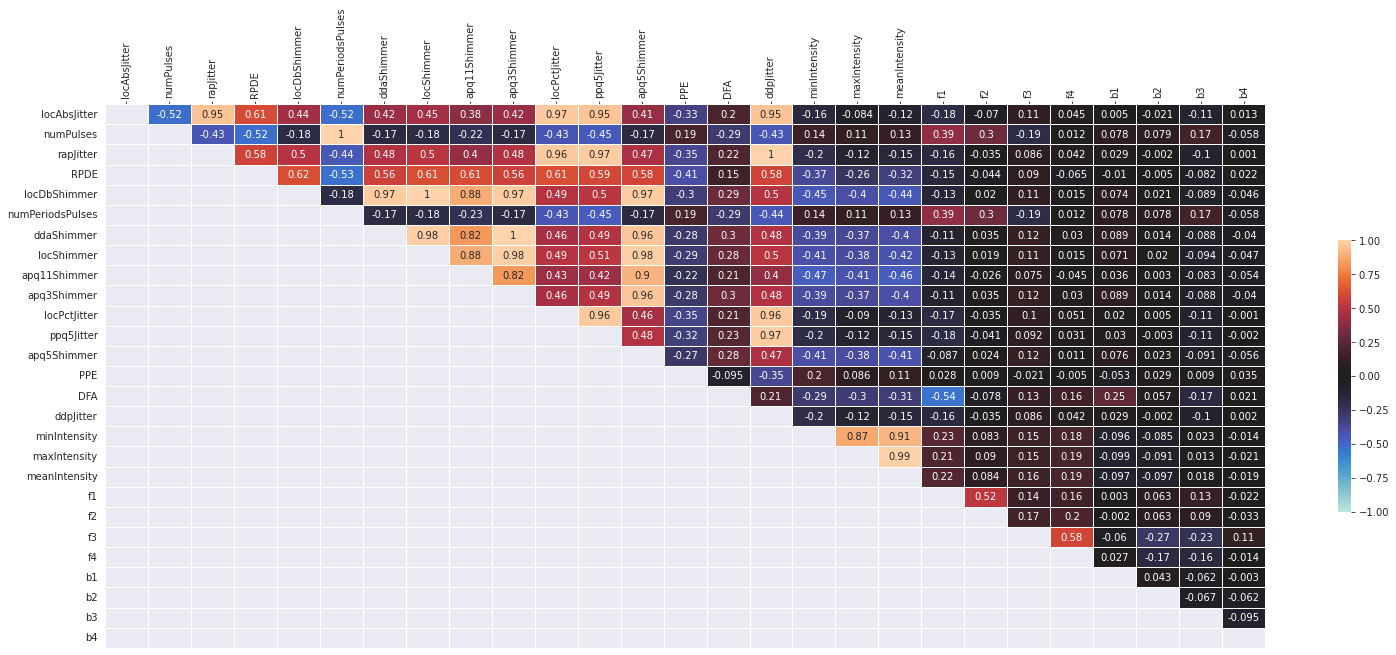

In [186]:
# Correlation
draw_correlation_matrix(extracted_df)

In [187]:
corr_feature = correlation(extracted_df,0.95)
print(f'There are {len(corr_feature)} which are highly correlated. They are {list(corr_feature)}.')
from_correlation = list(corr_feature)

There are 10 which are highly correlated. They are ['apq3Shimmer', 'locPctJitter', 'rapJitter', 'meanIntensity', 'ppq5Jitter', 'apq5Shimmer', 'numPeriodsPulses', 'ddaShimmer', 'locShimmer', 'ddpJitter'].


In [188]:
# Correlation with class

correlate = np.array([extracted_df[columns].corr(y) for columns in extracted_df.columns])
corr_df = pd.DataFrame(abs(correlate.round(5)),index=extracted_df.columns,columns=['Correlation with Class'])
corr_df.sort_values(by='Correlation with Class',ascending=True)

,Correlation with Class
f4,0.01431
b2,0.02090
b1,0.02648
f3,0.04902
b4,0.06260
PPE,0.07294
b3,0.07932
apq3Shimmer,0.12825
ddaShimmer,0.12826
apq5Shimmer,0.14909


Not a single feature has 0 correlation with class. So we don't need to remove any feature.

In [203]:
from sklearn.linear_model import LogisticRegression

# LASSO
LASSOfit = LogisticRegression(solver='liblinear',
                              penalty='l1',C=0.5,
                              random_state=321).fit(extracted_df_std,y.values)
modelCoeff = np.transpose(LASSOfit.coef_)[np.where(LASSOfit.coef_ == 0)[1]]
from_lasso = list(extracted_df.columns[np.where(LASSOfit.coef_ == 0)[1]])
pd.DataFrame(np.transpose(abs(LASSOfit.coef_)),
             index=extracted_df.columns,
             columns=['Lasso Coefficients']
             ).sort_values(by='Lasso Coefficients',
                           ascending=True)

,Lasso Coefficients
locAbsJitter,0.000000
rapJitter,0.000000
locDbShimmer,0.000000
numPeriodsPulses,0.000000
locShimmer,0.000000
f4,0.000000
maxIntensity,0.000000
ddpJitter,0.000000
f1,0.015692
b2,0.018429


In [204]:
from_lasso

['locAbsJitter',
 'rapJitter',
 'locDbShimmer',
 'numPeriodsPulses',
 'locShimmer',
 'ddpJitter',
 'maxIntensity',
 'f4']

In [206]:
# Sklearn feature selection techniques
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

We are not going to use Chi2 based feature selection because it is not applicable for numerical data.

We are going to use F-test based feature selection. The methods based on F-test estimate the degree of linear dependency between two random variables.
_f_classif_ alone with _SelectKBest_ will select the top k features.

In [29]:
feature_test_1 = SelectKBest(f_classif, k='all').fit(extracted_df_std, y.values.ravel())

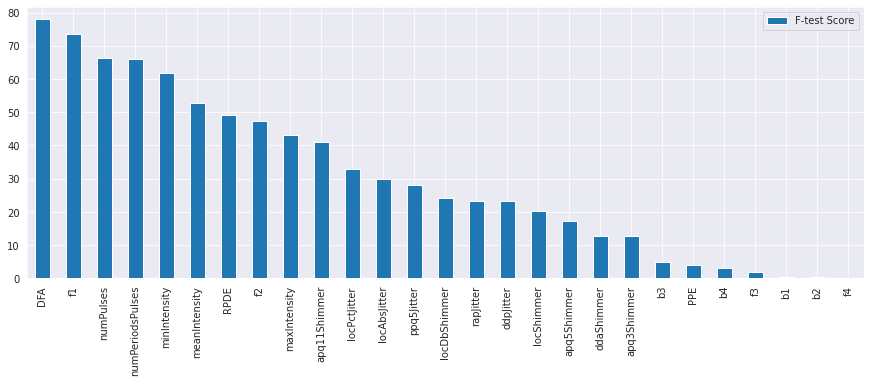

In [210]:
feature_test_1_df = pd.DataFrame(feature_test_1.scores_,
                                 columns=['F-test Score'],
                                 index=extracted_df_std.columns
                                 ).sort_values(by='F-test Score', ascending=False)
feature_test_1_df.plot(kind='bar',figsize=(15,5))

from_f_classif = list(feature_test_1_df.index)[-7:]

 Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.
 It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [212]:
feature_test_2 = mutual_info_classif(extracted_df_std, y.values,
                                     discrete_features=False,
                                     n_neighbors=5,
                                     random_state=321)

<AxesSubplot:>

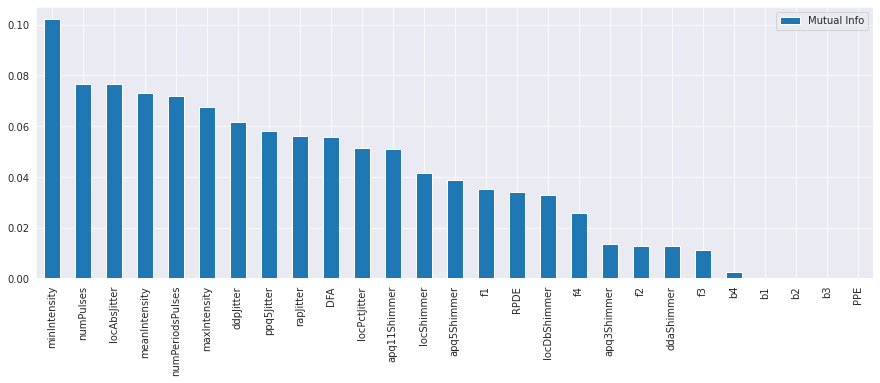

In [214]:
feature_test_2_df = pd.DataFrame(feature_test_2,
                                 columns=['Mutual Info'],
                                 index=extracted_df_std.columns
                                 ).sort_values(by='Mutual Info', ascending=False)
feature_test_2_df.plot(kind='bar',figsize=(15,5))


In [215]:
from_mutual_info = list(feature_test_2_df.index)[-7:]

---

array([[<AxesSubplot:title={'center':'PPE'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'numPeriodsPulses'}>,
        <AxesSubplot:title={'center':'ddaShimmer'}>,
        <AxesSubplot:title={'center':'apq11Shimmer'}>,
        <AxesSubplot:title={'center':'locShimmer'}>,
        <AxesSubplot:title={'center':'ddpJitter'}>],
       [<AxesSubplot:title={'center':'apq5Shimmer'}>,
        <AxesSubplot:title={'center':'ppq5Jitter'}>,
        <AxesSubplot:title={'center':'DFA'}>,
        <AxesSubplot:title={'center':'numPulses'}>,
        <AxesSubplot:title={'center':'locAbsJitter'}>,
        <AxesSubplot:title={'center':'locDbShimmer'}>,
        <AxesSubplot:title={'center':'locPctJitter'}>],
       [<AxesSubplot:title={'center':'apq3Shimmer'}>,
        <AxesSubplot:title={'center':'rapJitter'}>,
        <AxesSubplot:title={'center':'minIntensity'}>,
        <AxesSubplot:title={'center':'maxIntensity'}>,
        <AxesSubplot:title={'center':'meanInten

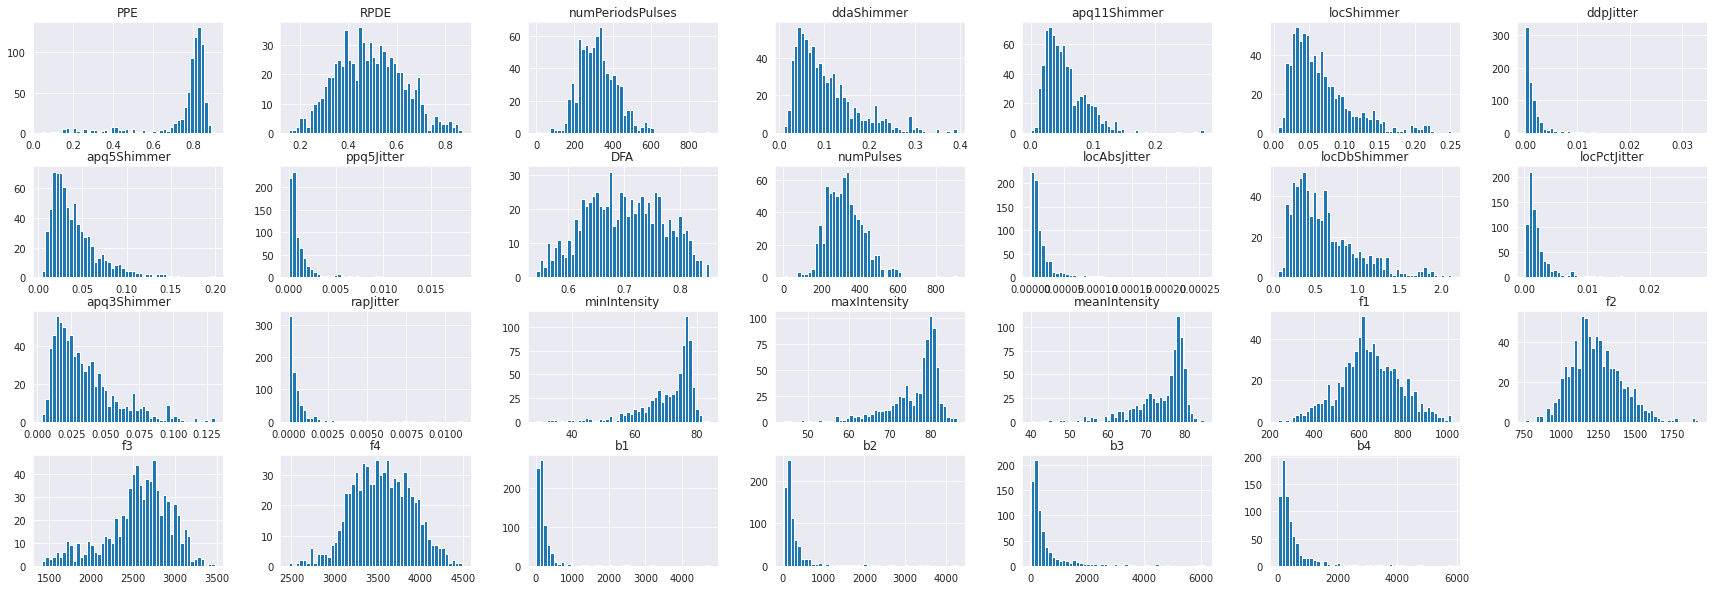

In [61]:
# Data Distribution
extracted_df.hist(layout=(4,7),figsize=(30,10),bins=50)